# Module Test Template

## Module & Test Description

### Imports
##### General Imports

In [1]:
import os, sys, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import shapely as sh
from math import *
import collections.abc

##### Extend PYPATH to current folder:
This allows importing libraries from the same folder; <code>pathlib.Path().resolve()</code> returns the path of the current directory.

In [2]:
sys.path.extend([pathlib.Path().resolve()])

Import specific testing modules:

## Create Points for Circular Object
Create an array of the angles, from which we'll **create an array of cartesian coordinates for a circle**

In [3]:
n = 6
r = 1
coords = np.zeros([n,2])
for i in range(0,n):
    coords[i,0]= r * cos(2*pi/n*i)
    coords[i,1]= r * sin(2*pi/n*i)

In [4]:
coords

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  8.66025404e-01],
       [-5.00000000e-01,  8.66025404e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-5.00000000e-01, -8.66025404e-01],
       [ 5.00000000e-01, -8.66025404e-01]])

We can create a function that will write these coordinates:

In [5]:
def circle_points(radius, point_count = 30):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= radius * cos(2*pi/point_count*i)
        xys[i,1]= radius * sin(2*pi/point_count*i)
    return xys

Let's plot the graphic to see how it looks

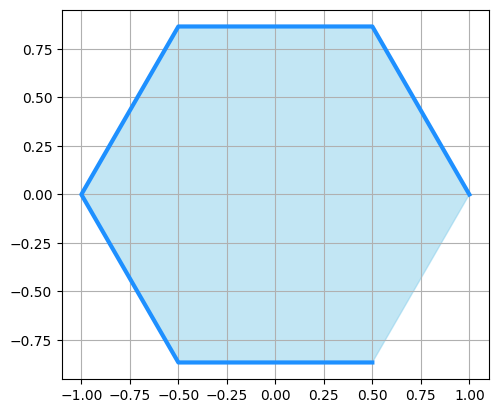

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
plt.grid()

ax.fill(coords[:,0],coords[:,1],color="skyblue",alpha=0.5)
plt.plot(coords[:,0],coords[:,1],color="dodgerblue",linewidth=3)

We need a simple function that will take the first coordinate, and appned it to the end, in order to **create a closed polygon**.

In [7]:
def close_polygon(arr):
    return np.append(arr,[arr[0]],axis=0)

We can create a simple function that will allow us to plot these images quickly:

In [8]:
def plot_polygon(arr, unit = 1):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(unit))
    ax.yaxis.set_major_locator(plt.MultipleLocator(unit))
    plt.grid()
    
    ax.fill(arr[:,0],arr[:,1],color="skyblue",alpha=0.5)
    plt.plot(arr[:,0],arr[:,1],color="dodgerblue",linewidth=3)

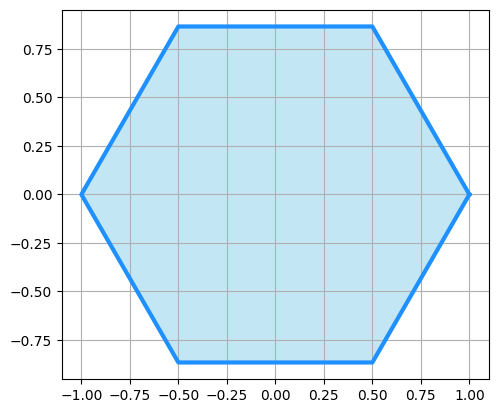

In [9]:
coords = close_polygon(coords)
plot_polygon(coords, 0.25)

Let's try another example with a greater number of points:

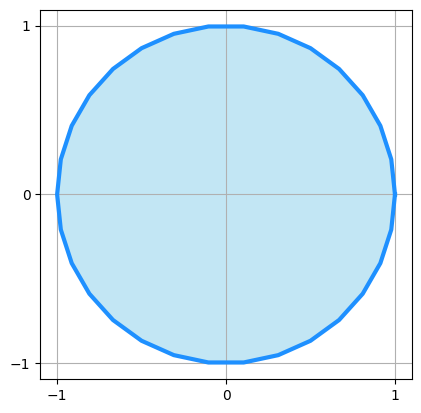

In [10]:
n = 30
r = 1
circle = close_polygon(circle_points(r,n))
plot_polygon(circle)

Let's create a function to create an array of cartesian **coordinates for an ellipse**:

In [11]:
def ellipse_points(short_radius, long_radius, point_count = 30):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= short_radius * cos(2*pi/point_count*i)
        xys[i,1]= long_radius * sin(2*pi/point_count*i)
    return xys

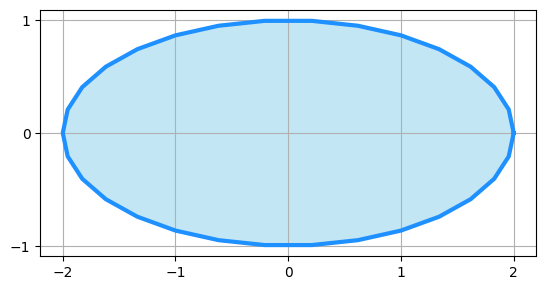

In [12]:
a = 2
b = 1
n = 30
ellipse = close_polygon(ellipse_points(a,b,n))
plot_polygon(ellipse,1)

Let's create an array of cartesian coordinates for portions of cirles and ellipses. Let's default to quarters of these objects, but allow for changing the total sweep. Assume that the sweep starts at 0 radians.

In [13]:
max_angle = pi/2 # Sweep to 90°

n = 30
r = 1
coords = np.zeros([n,2])
for i in range(0,n):
    coords[i,0]= r * cos(max_angle/n*i)
    coords[i,1]= r * sin(max_angle/n*i)

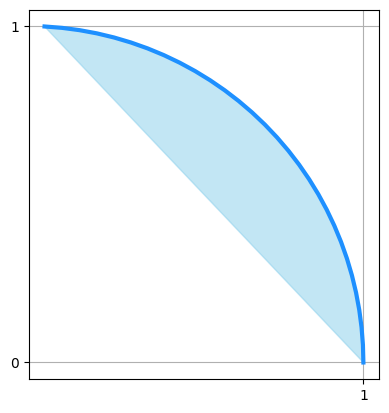

In [14]:
plot_polygon(coords)

Observations:
1. We need to make sure that an angle greater than $ 2\pi $ is not put in and
2. We need to an interior point for the origin if an angle less than $ 2\pi $ is used
3. Note that in this case we need to divide the max_angle by n-1 points, because we're only doing part of a circle.
4. Make sure we cannot divide by zero, so point_count should be at least 2

In [15]:
r = 1
n = 30
max_angle = 3*pi/2

def circle_points(radius, point_count = 30, max_angle = 2 * pi):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= radius * cos(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
        xys[i,1]= radius * sin(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
    if max_angle < 2 * pi:
        xys = np.append(xys,[[0,0]],axis=0)
    return xys

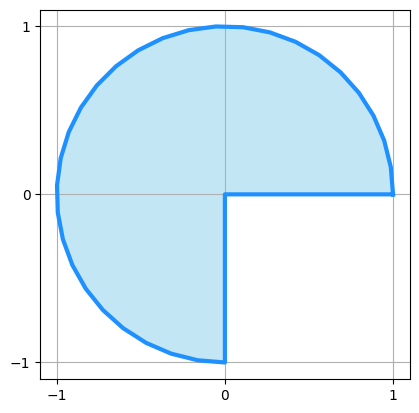

In [16]:
partial_circle = close_polygon(circle_points(r,n,max_angle))
plot_polygon(partial_circle)

This shape is a **circular sector***. Now, let's create an **elliptical sector**:

In [17]:
def ellipse_points(short_radius, long_radius, point_count = 30, max_angle = 2 * pi):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= short_radius * cos(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
        xys[i,1]= long_radius * sin(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
    if max_angle < 2 * pi:
        xys = np.append(xys,[[0,0]],axis=0)
    return xys

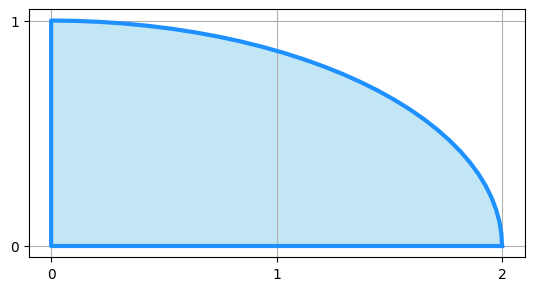

In [18]:
a = 2
b = 1
n = 30
max_angle = pi/2
partial_ellipse = close_polygon(ellipse_points(a,b,n,max_angle))
plot_polygon(partial_ellipse)

If we remove the origin point, then the resulting shapes is a **circular segment** and an **elliptical segment**.

In [19]:
def circular_segment_points(radius, point_count = 30, max_angle = 2 * pi):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= radius * cos(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
        xys[i,1]= radius * sin(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
    return xys

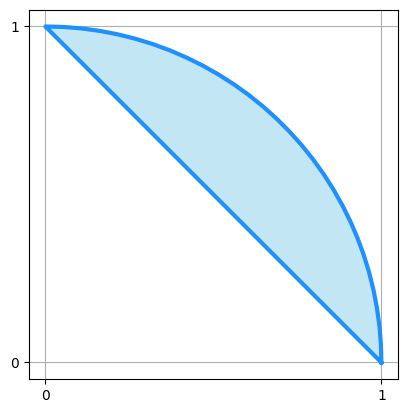

In [20]:
partial_circle = close_polygon(circular_segment_points(r,n,max_angle))
plot_polygon(partial_circle)

In [21]:
def ellipse_segment_points(short_radius, long_radius, point_count = 30, max_angle = 2 * pi):
    xys = np.zeros([point_count,2])
    for i in range(0,n):
        xys[i,0]= short_radius * cos(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
        xys[i,1]= long_radius * sin(min(2*pi, max_angle)/(max(point_count,2)-1)*i)
    return xys

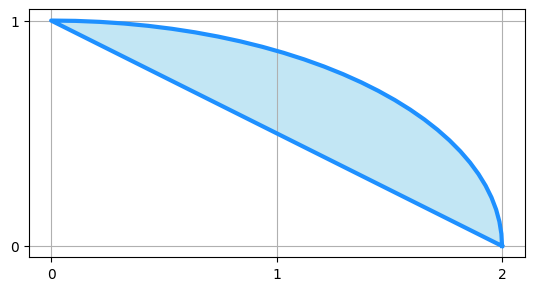

In [22]:
partial_ellipse = close_polygon(ellipse_segment_points(a,b,n,max_angle))
plot_polygon(partial_ellipse)

## Transformation Operations
### Rotation Matrix
Create a function that will perform a rotation operation on an array of coordinates. To keep things simple, we'll require that the rotation be in terms of *radians*. Counterclockwise (CCW) rotation is positive.

In [23]:
def rotate(arr, rads):
    transform = np.array([[cos(rads),-sin(rads)],[sin(rads),cos(rads)]]).transpose()
    return np.matmul(arr,transform)

Create a circular sector (fan) and then we'll rotate it by 45°

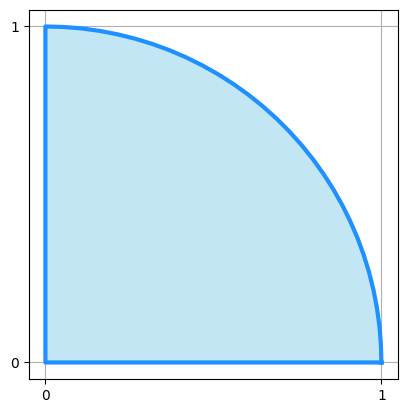

In [24]:
r = 1
n = 30
max_angle = pi/2
fan = close_polygon(circle_points(r,n,max_angle))
plot_polygon(fan)

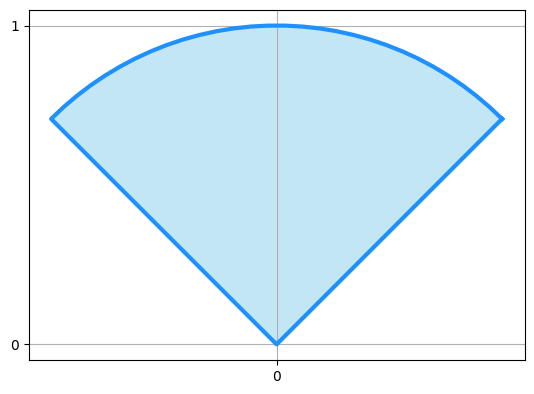

In [25]:
rotation_angle = radians(45)
rotated_fan = rotate(fan,rotation_angle)
plot_polygon(rotated_fan)

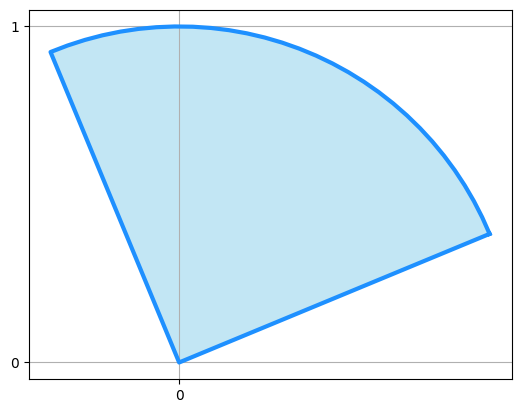

In [26]:
rotation_angle = radians(22.5)
rotated_fan = rotate(fan,rotation_angle)
plot_polygon(rotated_fan)

### Reflection
Specify an axis of rotation (radians), starting with the x axis as 0°

In [27]:
def reflection(arr, rads):
    transform = np.array([[cos(2*rads),sin(2*rads)],[sin(2*rads),-cos(2*rads)]])
    return np.matmul(arr,transform)

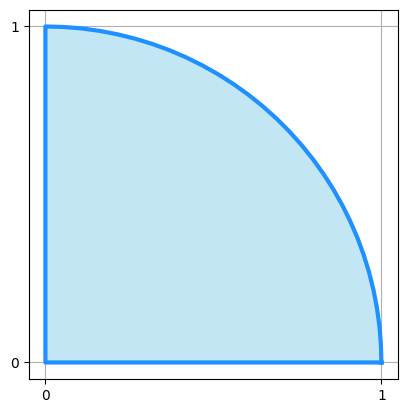

In [28]:
r = 1
n = 30
max_angle = pi/2
fan = close_polygon(circle_points(r,n,max_angle))
plot_polygon(fan)

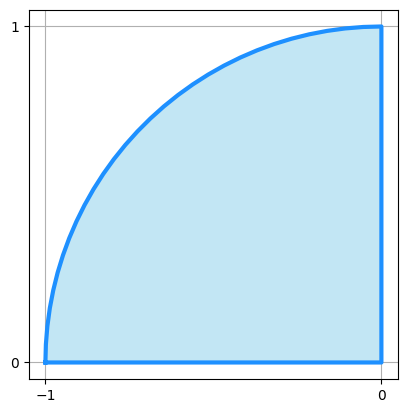

In [29]:
axis = radians(90)
reflected_fan = reflection(fan, axis)
plot_polygon(reflected_fan)

### Translation Transform
Translate by a distance dx or dy

In [30]:
d = np.array([0,0])

def translate(arr,d):
    new_arr = np.copy(arr)
    new_arr[:,0] = new_arr[:,0] + d[0]
    new_arr[:,1] = new_arr[:,1] + d[1]
    return new_arr

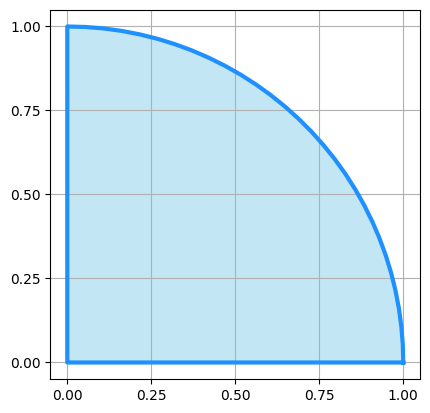

In [31]:
plot_polygon(fan,0.25)

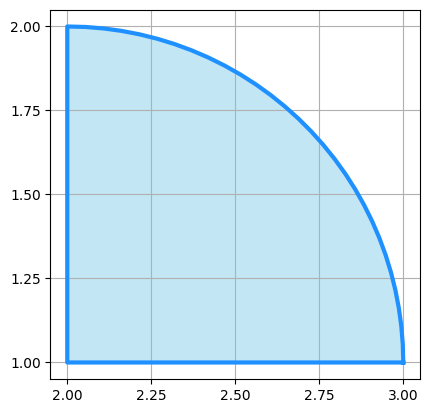

In [32]:
d = np.array([2,1])
translated_fan = translate(fan,d)
plot_polygon(translated_fan,0.25)

### Scale Transform
Scale by factors sx, sy

In [33]:
def scale(arr, scale):
    transform = np.array([[scale[0],0],[0,scale[1]]])
    return np.matmul(arr,transform)

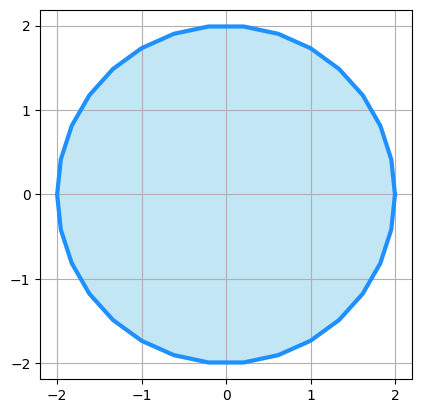

In [34]:
scale_factor = np.array([2,2])
scaled_circle = scale(circle, scale_factor)
plot_polygon(scaled_circle)

The scale transform works in two independent directions, however, let's update the function so that if only one scale factor is passed, it will be applied equally to both axes. We can add a test to see if it's a python list, or an numpy array.

In [35]:
test_if_array = isinstance(scale_factor,(collections.abc.Sequence, np.ndarray))
test_if_array

True

In [36]:
def scale(arr, scale):
    if isinstance(scale,(collections.abc.Sequence, np.ndarray)):
        transform = np.array([[scale[0],0],[0,scale[1]]])
    else:
        transform = np.array([[scale,0],[0,scale]])
    return np.matmul(arr,transform)

Test with a scalar scale factor:

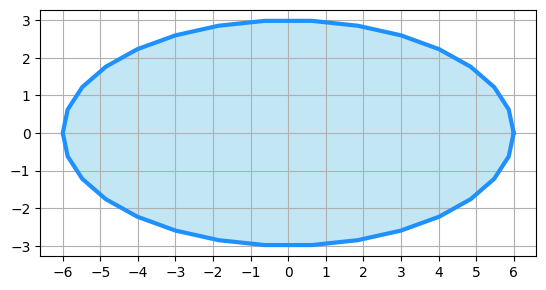

In [37]:
scale_factor = 3
scaled_ellipse = scale(ellipse,scale_factor)
plot_polygon(scaled_ellipse)

Test with a python list of scale factors:

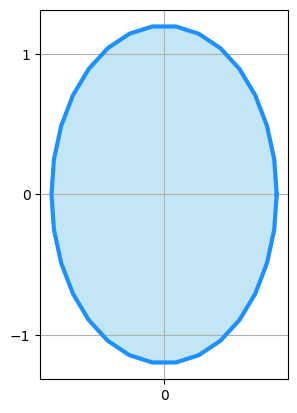

In [38]:
scale_factor = [0.4,1.2]
scaled_ellipse = scale(ellipse,scale_factor)
plot_polygon(scaled_ellipse)

Test with a numpy array of scale factors

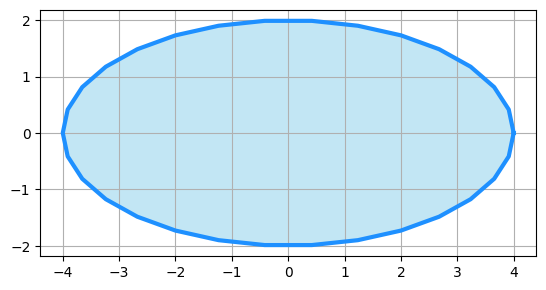

In [39]:
scale_factor = np.array([2,2])
scaled_ellipse = scale(ellipse,scale_factor)
plot_polygon(scaled_ellipse)

### Skew Matrix

In [40]:
def skew(arr, skew_factors):
    transform = np.array([[1,skew_factors[0]],[skew_factors[1],1]]).transpose()
    return np.matmul(arr,transform)

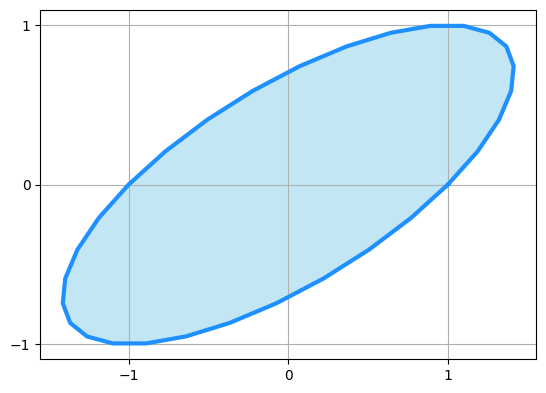

In [41]:
skew_factors = np.array([1,0])
skewed_circle = skew(circle,skew_factors)
plot_polygon(skewed_circle)

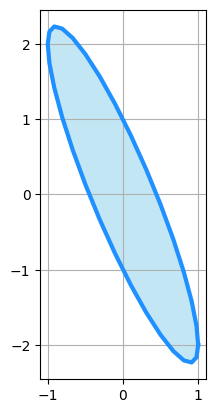

In [42]:
skew_factors = np.array([0,-2])
skewed_circle = skew(circle,skew_factors)
plot_polygon(skewed_circle)